<a href="https://colab.research.google.com/github/BANZOM/MachingLearningStuffs/blob/main/Linear_Regression_Trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goals
In this lab you will:
- Learn to implement the model $f_{w,b}$ for linear regression with one variable

## Notation
Here is a summary of some of the notation you will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values (in this lab - Size (1000 sqft))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab Price (1000s of dollars))  | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


In [37]:
import numpy as np
import matplotlib.pyplot as plt


In [38]:
# Selecting the style for plotting
# plt.style.available
plt.style.use('seaborn-darkgrid')

Please run the following code cell to create your `x_train` and `y_train` variables. The data is stored in one-dimensional NumPy arrays.

In [39]:
# x_train is the input variable
# y_train is the output/target variable
x_train= np.array([10,20,30,40,50])
y_train= np.array([12000,18000,22000,25000,31000])

In [40]:
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [10 20 30 40 50]
y_train = [12000 18000 22000 25000 31000]


### Number of training examples `m`
You will use `m` to denote the number of training examples. Numpy arrays have a `.shape` parameter. `x_train.shape` returns a python tuple with an entry for each dimension. `x_train.shape[0]` is the length of the array and number of examples as shown below.

In [41]:
m = x_train.shape[0]
print(f"x_train Shape/NO of training examples is {m}")

x_train Shape/NO of training examples is 5


One can also use the Python `len()` function as shown below.

In [42]:
m = len(x_train)
print(f"x_train Shape/NO of training examples is {m}")

x_train Shape/NO of training examples is 5


### Training example `x_i, y_i`

You will use (x$^{(i)}$, y$^{(i)}$) to denote the $i^{th}$ training example. Since Python is zero indexed, (x$^{(0)}$, y$^{(0)}$) is (10,12) and (x$^{(1)}$, y$^{(1)}$) is (20,18). 

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of `x_train` is `x_train[0]`.
Run the next code block below to get the $i^{th}$ training example.

In [43]:
i=2 # change the value of i to see ((x^i, y^i))

x_i = x_train[i]
y_i = y_train[i]

print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(2), y^(2)) = (30, 22000)


we can plot these two points using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 
- The function arguments `marker` and `c` show the points as red crosses (the default is blue dots).

You can use other functions in the `matplotlib` library to set the title and labels to display

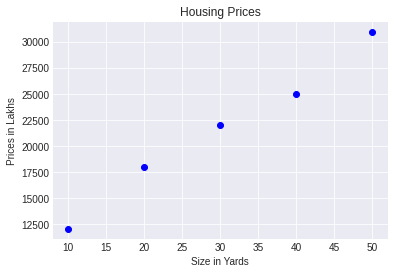

In [44]:
# Plot the data points

plt.scatter(x_train,y_train,marker='o',c='b')
plt.title('Housing Prices');
plt.xlabel("Size in Yards")
plt.ylabel("Prices in Lakhs")
plt.show()

the model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how we can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/> 
Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$. 

In [56]:
w = 100
b = 100

print(f"w = {w} \nb = {b} ")

w = 100 
b = 100 


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.

In [57]:
def compute_model_output(x,w,b):
    _len = len(x)
    f_wb = np.zeros(_len)
    for i in range (_len):
        f_wb[i] = w*x[i] + b
    return f_wb

In [58]:
# calling the fuction for output
temp_f_wb= compute_model_output(x_train, w,b)

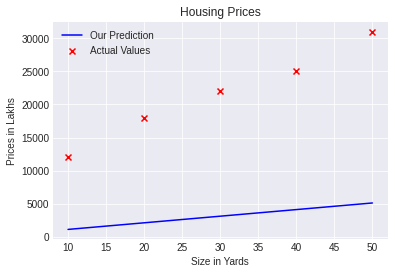

In [59]:
# plotting
plt.plot(x_train, temp_f_wb , c='b', label="Our Prediction" )
plt.scatter(x_train, y_train, marker = 'x', c = 'r', label = "Actual Values")
plt.title("Housing Prices")
plt.xlabel("Size in Yards")
plt.ylabel("Prices in Lakhs")
plt.legend()
plt.show()



As you can see, setting  $w = 100$ and $b = 100$ does *not* result in a line that fits our data.

We'll experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?


'Testing to get the possible best fit line'

In [86]:
w = 200
b = 16000

print(f"w = {w} \nb = {b} ")

w = 200 
b = 16000 


In [87]:
# calling the fuction for output
temp_f_wb= compute_model_output(x_train, w,b)

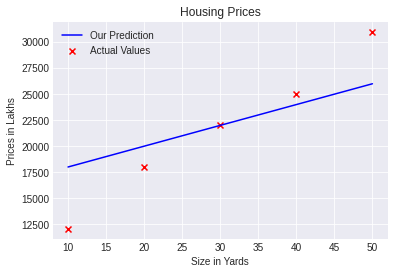

In [88]:
# plotting
plt.plot(x_train, temp_f_wb , c='b', label="Our Prediction" )
plt.scatter(x_train, y_train, marker = 'x', c = 'r', label = "Actual Values")
plt.title("Housing Prices")
plt.xlabel("Size in Yards")
plt.ylabel("Prices in Lakhs")
plt.legend()
plt.show()

